In [76]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data Analyst\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv", encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
# Droping unrelated/empty columns
df.drop(["Status", "unnamed1"], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
df.dropna(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [10]:
# Changing data format of column
df["Amount"] = df["Amount"].astype("int")

In [11]:
df["Amount"].dtype


dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.rename(columns = {"Marital_Status":"Married"}).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [14]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### GENDER

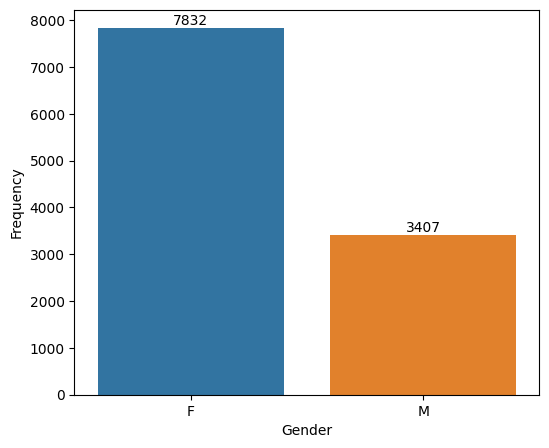

In [15]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = 'Gender', hue = "Gender", data = df)
plt.ylabel("Frequency")
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


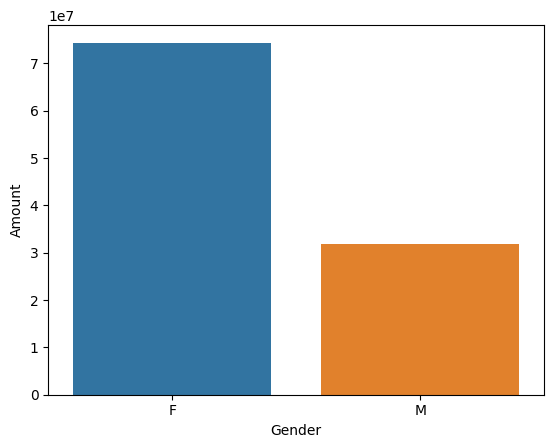

In [17]:
sns.barplot(x = "Gender", y = "Amount", hue = "Gender", data = sales_gen)
plt.show()

From above two graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### MARITAL STATUS

In [19]:
Marital_df = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = 'Amount', ascending= False)
Marital_df

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


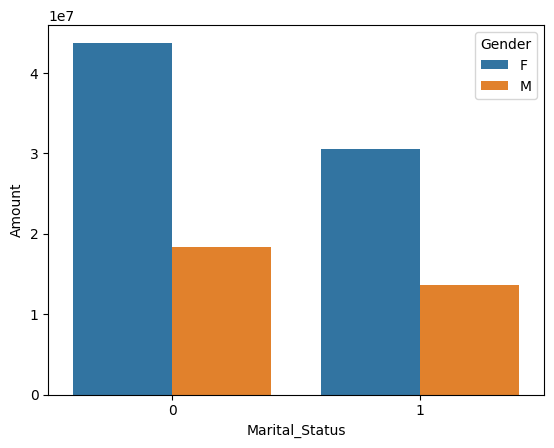

In [20]:
sns.barplot(x = "Marital_Status", y = "Amount", data = Marital_df, hue = "Gender")
plt.show()

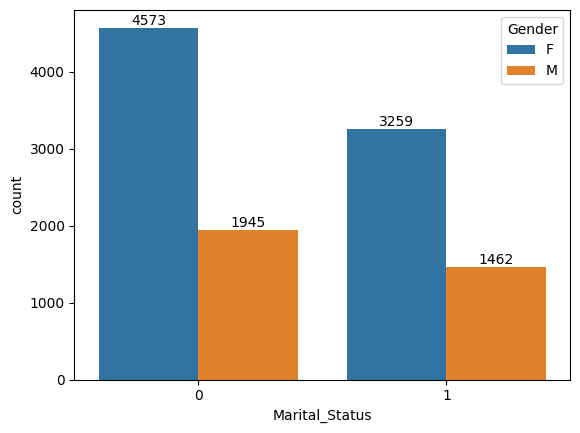

In [21]:
ax = sns.countplot(x = "Marital_Status", data = df, hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can findout that mostly buyers are Unmarried(woman) with high purchasing power

#### OCCUPATION

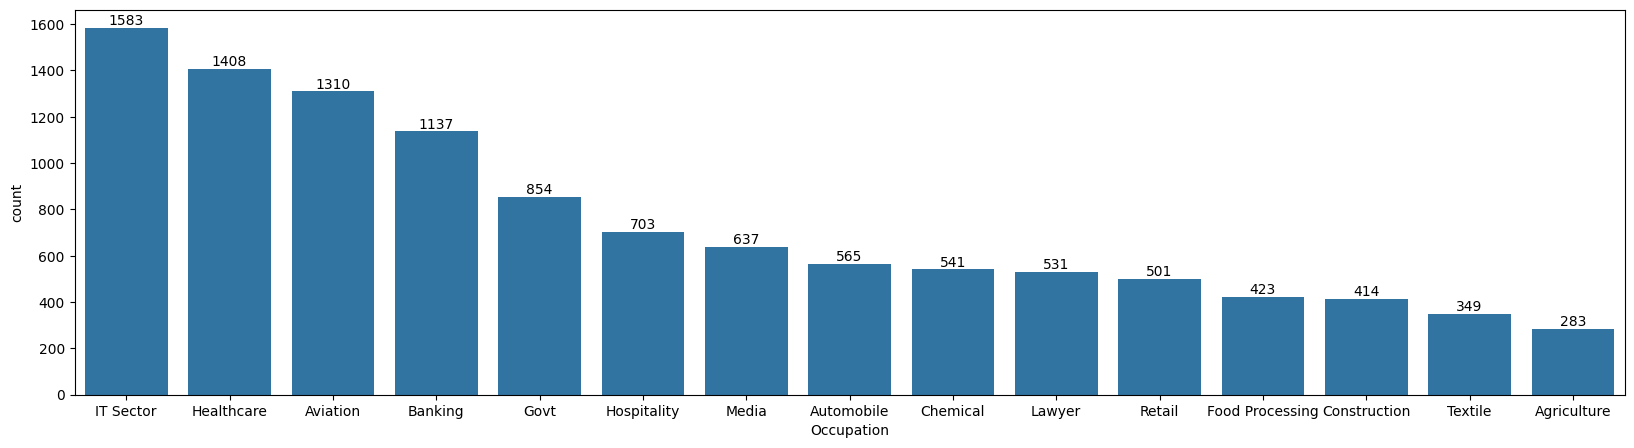

In [23]:
Occup_count = df["Occupation"].value_counts().index
plt.figure(figsize = (20,5))
ax = sns.countplot(x = "Occupation", data = df, order = Occup_count)
for bars in ax.containers:
    ax.bar_label(bars)


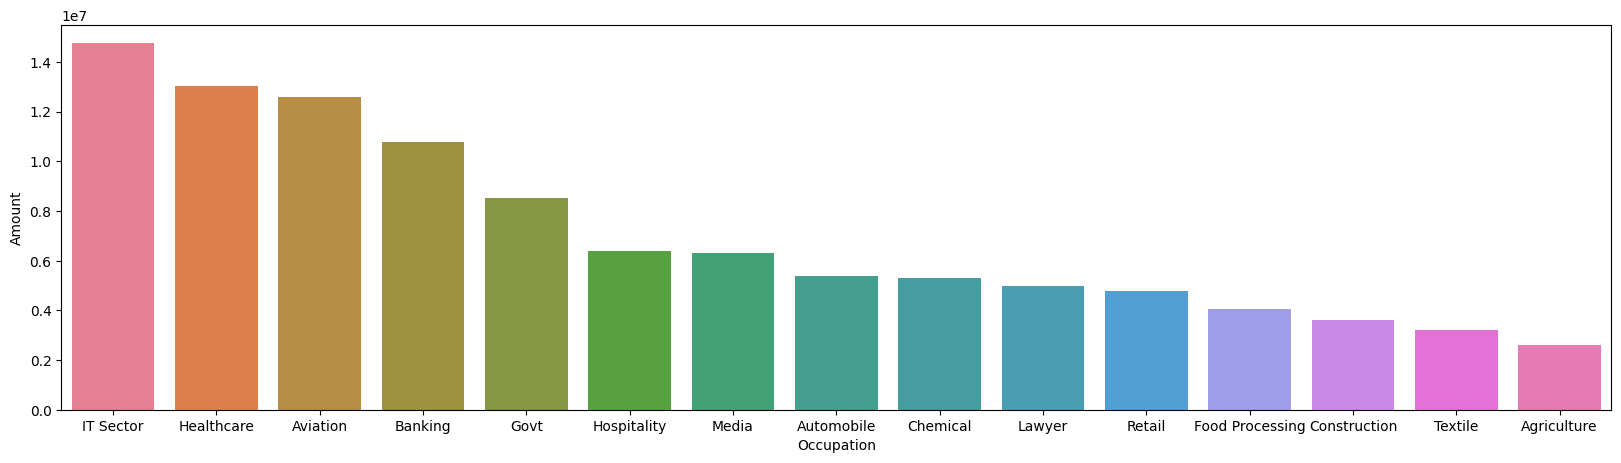

In [24]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize = (20, 5))
#sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', hue = "Occupation")
plt.show()

High purchasing power top buyers belong to IT, Healthcare, Aviation, Banking.

### Age

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

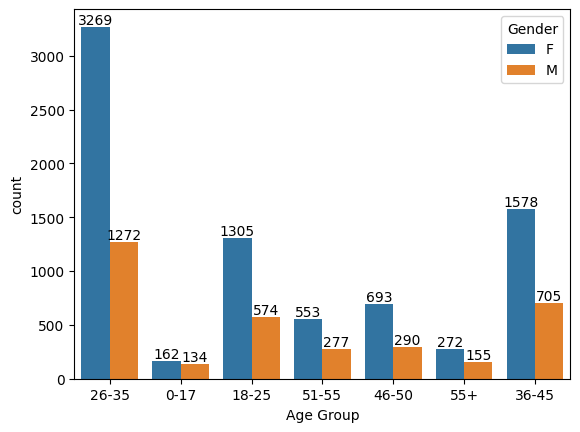

In [26]:
ax = sns.countplot(x = 'Age Group', data = df, hue = "Gender")
for bars in ax.containers:
    ax.bar_label(bars)

In [27]:
Amnt_Age = df.groupby(["Age Group"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
Amnt_Age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


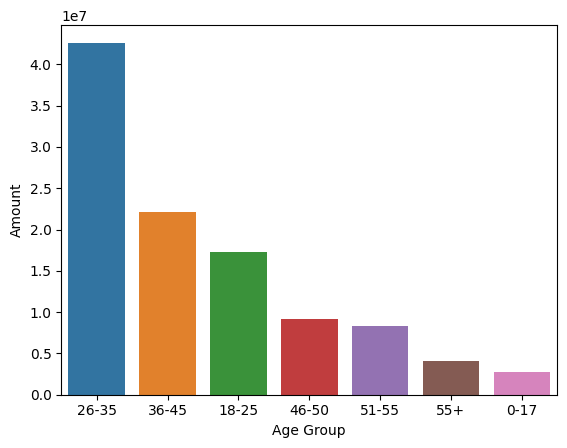

In [28]:
sns.barplot(x = "Age Group", y = "Amount",hue = "Age Group", data = Amnt_Age)
plt.show()

Most buyers fall in the 26–35 age group. Within purchasing power, women aged 26–35 and men aged 36–45 lead the purchases.

### STATES

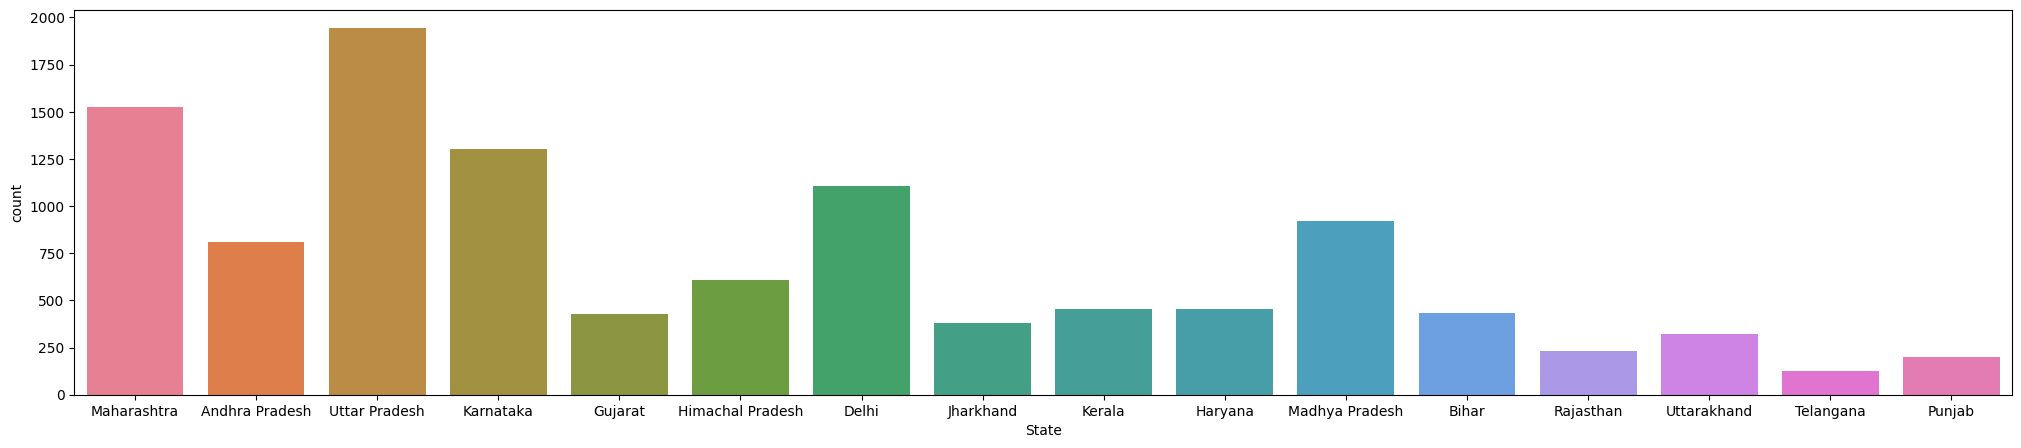

In [30]:
plt.figure(figsize = (25, 5))
sns.countplot(x = "State", hue = 'State', data = df )
plt.show()

In [49]:
Amnt_stt = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
Amnt_stt

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


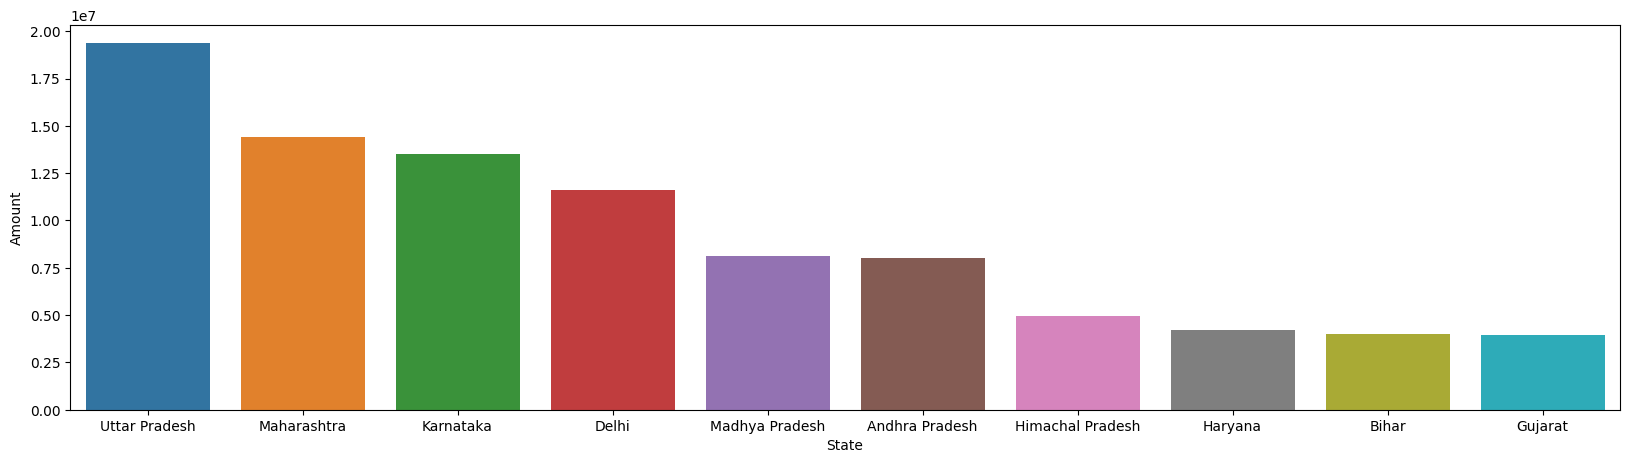

In [50]:
plt.figure(figsize = (20,5))
sns.barplot(x = "State", y = "Amount", data = Amnt_stt, hue = "State")
plt.show()

Mostly buyers are from UP, Maharashtra, Karnataka, Delhi etc.

### PRODUCT CATEGORY

In [54]:
df.value_counts("Product_Category")

Product_Category
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

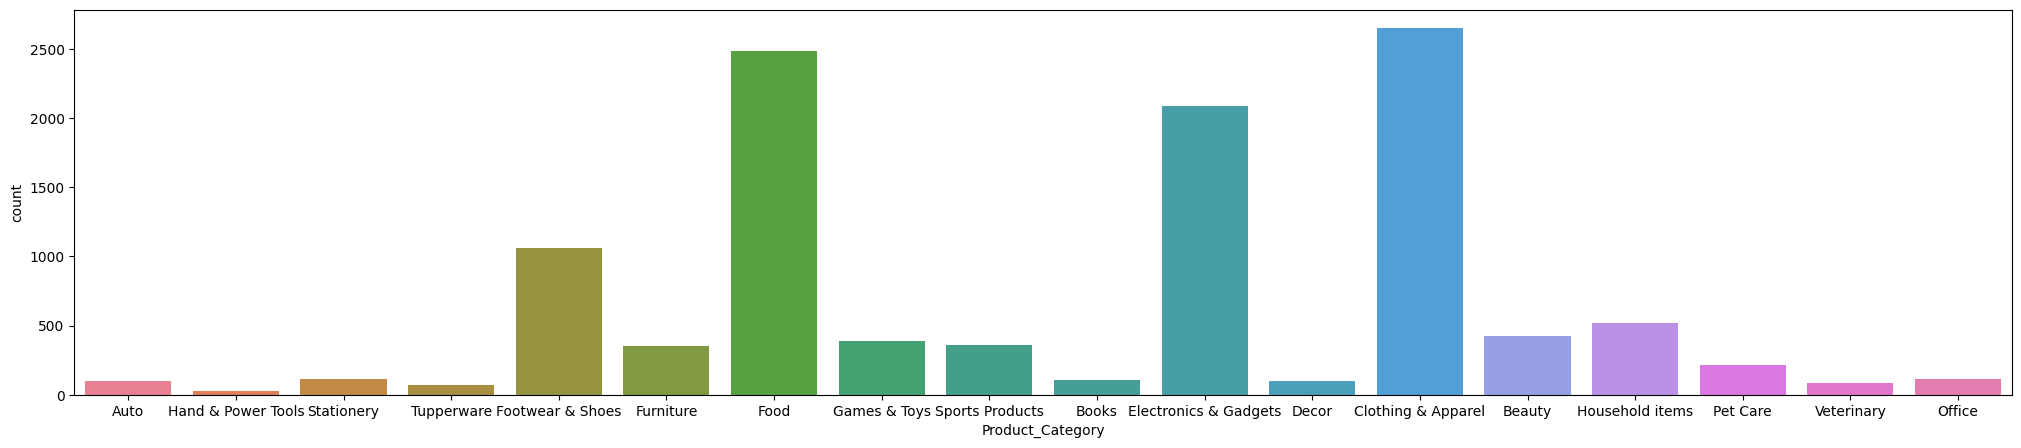

In [60]:
plt.figure(figsize = (25,5))
sns.countplot(x = "Product_Category", data = df, hue = "Product_Category")
plt.show()

In [70]:
Amnt_Prt = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(7)

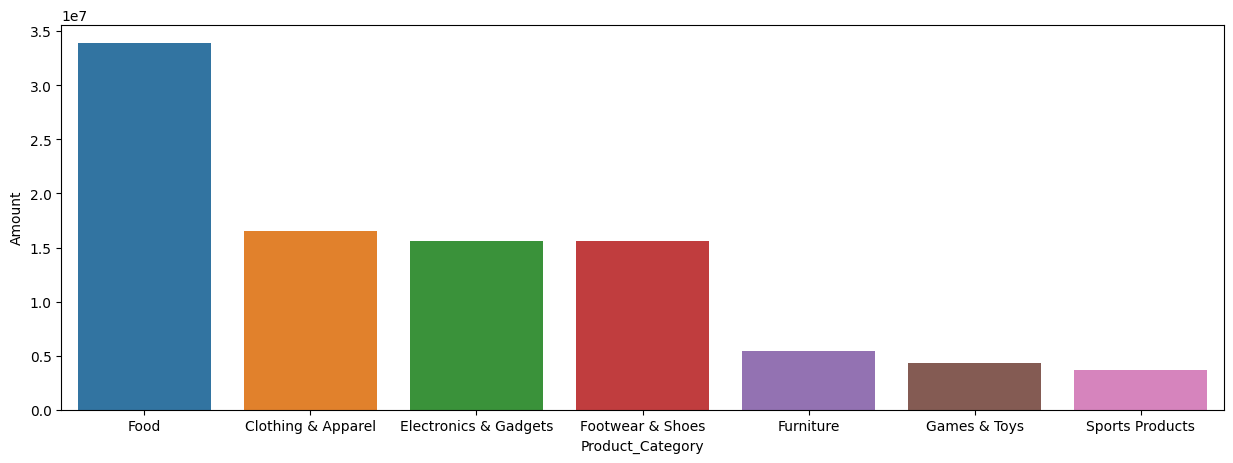

In [75]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Product_Category", y = "Amount", data = Amnt_Prt, hue = "Product_Category")
plt.show()

Customers primarily purchase products from the Clothing & Apparel, Food, and Electronics & Gadgets categories. However, the Food category contributes the highest share of revenue.